# <center>Simple convolutional neural network with Pytorch</center>

>*Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers.*

__Deep Learning__, I. Goodfellow & al.

Our aim in this section is to use multiple methods introduced by CNN in order to outperform simple fully connected neural networks. We will first describe each method and explain the motivation behind. Then, we will train a model using all these methods and compare it to simple neural networks. 

Note : we will mostly use __Deep Learning__, I. Goodfellow & al.

<a name="table"></a>
- **I- [The convolution operator simplifies the network](#convolution)**
	- 1- [Principle of convolution](#principle_conv)
	- 2- [Motivation behind convolution](#motivation_conv)
 - **II- [Pooling to improve statistic robustness](#pooling)**
	- 1- [What is pooling ?](#what_pool)
	- 2- [Different ways of pooling](#diff_pool)
    - 3- [Pooling is useful for object detection](#detect_pool)
 - **III- [Batch normalization to reduce internal covariate shift](#batch)**
	- 1- [What is pooling ?](#what_pool)

<a name="convolution"></a>
# I- The convolution operator simplifies the network

<a name="principle_conv"></a>
## 1. Principle of convolution

Convolution is a bilinear operation between two functions $ f $ and $ g $  that share the same domain $ \mathcal{D} $ :

## $$ (f,g) \mapsto f*g $$ 

## $$ \forall x \in \mathcal{D}\:\: (f*g)(x)\: = \int f(t)g(x-t)dt $$

In mathematics, this operation is generalizing the concept of *moving average*. Indeed, it can been seen as a weighted average of function $f$ where $g$ plays the role of the weight function. 

In the case of CNN, if we consider that our data is a bit noisy, the idea is to create a weighted average of an input in order to smooth the output and therefore reduce the impact of the noise. Of course, we have a limited amount of features and we work in a discrete space. For a two dimensional image $X$, and a two-dimensional weight $W$ of size $(m \times n)$ the convolution operation consists in : 

## $$ (X*W)_{(i,j)} = \sum_{m} \sum_{n} X_{(m,n)}W_{(i-m,j-n)} $$

- $X$ is called the **input**
- $W$ is called the **kernel**
- the result is called the **feature map**

Here is an example of a 2-convolution. The output is calculated in positions where the kernel *fits* inside the input (it is called a *valid* convolution). In this case, the kernel has always only 4 non-zero parameters, which is why we can graphically and computationnaly represent it as a $4 \times 4$ matrix :

![](https://www.d2l.ai/_images/conv-pad.svg)

<a name="motivation_conv"></a>
## 2. Motivation behind convolution

Convolution operation has dramatically changed the way we design neural networks for 3 main reasons : models are **faster**, require **less memory**, and are more able to **detect patterns** in images and time series. 

### - Sparse interactions :

Instead of creating fully connected nodes, convolution sets up a new neural architecture based on sparse interactions : only a **limited amount of input nodes is linked with an output node**. In the case of an image processing, it is useful as it can be seen as a *feature detection* such as edges, etc. Above all, it drastically decreases the number of operations to compute and therefore the model training converges more easily. The **complexity** of the algorithm is clearly decreased. 

For example, let say our input size is $n$ and output size $m$. In a fully connected neural network, the parameter $W$ size would be $n \times m$ while we can limit the number of interactions in a CNN and create a parameter $W'$ of size $k \times m$ with $k << n$. In terms of complexity, we have : 

- $\mathcal{O}(n \times m)$ for fully connected NN
- $\mathcal{O}(k \times m)$ for CNN

Below is a drawing of sparse connected layers vs fully connected layers. As we can see, only a few inputs are used to compute $s_{3}$ : 

![](https://miro.medium.com/max/468/1*jkhJotQX3uz-Ja7QDOKQBg.png)

### - Parameter sharing :

During a forward propagation of an input in a fully layer, an element of the weight matrix is used only once, while it is used multiple times in a CNN. In the example above (see *Principle of convolution*) each parameter is used 16 times (i.e. the dimension of the output). We call them **tied parameters**. It does not affect the computation time but it helps reducing the memory needed to store weights during the execution of the learning task. So, if we keep the same notations as before, we already said we only needed a $k \times n$ weight matrix. Actually, we can go deeper as the parameters used are the same during the $m$ computations : 

- $W \in \mathbb{R}^{n \times m}$ for fully connected NN
- $W' \in \mathbb{R}^{k}$ for CNN

Of course, $k << n \times m$ in practice. 


### - Equivariance :

Mathematically, the term of equivariance is used when the order of the application of two functions does not affect the result. Given an input $x$ : 

## $$ f \circ  g (x) = g \circ  f (x) $$

In the case of CNN, layers have a more specific property : **equivariance to translation**. It means that no matter if you shift an image or a time serie before or after the convolution process, the result will be the same. However it is not the case for rotation or scaling. It enables features and patterns detection : edges that looks the same in an image, trends that are similar in a time serie, will be roughly processed in the same way. 

<a name="pooling"></a>
# II- Pooling to improve statistic robustness 

<a name="what_pool"></a>
## 1. What is pooling ?

Pooling consists in **summing-up** information contained in the input by reducing its size. When it is well used, it creates **statistical robustness** and help to make **data smaller** before being processed again. Below is a max pooling over the 4 parts of an input : 

![](https://www.datascience.com/hs-fs/hubfs/CNN%204.png?width=600&name=CNN%204.png)

In image processing, if the goal of the learning task is to detect whether there is a specific object or not (rather than its specific location on an image), pooling is very useful as it is **invariant to small translations**. Using pooling makes the assumption that the function we want to approximate is quite invariante to small shifts :

![](../data/images/pooling_drawing.png)

As we can see in the drawing above, even if all the input have moved to the right in the bottom example, the output remains quite the same. 

<a name="diff_pool"></a>
## 2. Different ways of pooling

### - The choice of the operator :

Many operations can help to reduce the size of the input while summing up information. Here are the main ones :

- average pooling : it consists in computing the average value of a $k \times k$ kernel
- max pooling : it consists in computing the maximum value of a $k \times k$ kernel
- min pooling : it consists in computing the minimum value of a $k \times k$ kernel

You can see below an example of these methods applied on a MNIST sample. A $2 \times 2$ filter has been used, stride size is exactly 2 and we didn't use padding (see next section) :

![](../data/images/pooling.png)

### - kernel size, stride, padding  :

For both pooling and convolution operators, the **kernel size** will determine the size of the feature detected by the layer. Padding consists in giving importance to the edges of an image by including these pixels to more operations. As you can see below, by adjusting the **padding**, one can keep the same size as the original image while increasing the kernel size : 

![](../data/images/size.png)
*note : max pooling has been used*

**Stride** has also effects on the behaviour of the kernel and the output size. A stride of 2 means that each time the kernel is applied, it moves two values to the right, and two to the bottom when it ends a line. The effect on the input is called **downsampling** : we reduce the amount of information by summing it up. Below is the simplest downsample one can do : each stride value, we keep a pixel and discard the others : 

![](../data/images/stride.png)
*note : no operator has been used*

<a name="detect_pool"></a>
## 3. Pooling is useful for object detection

As we said, pooling helps to make the object we want to detect in an image **invariant** to small translation :

>*The use of pooling can be viewed as adding an infinitely strong prior that
the function the layer learns must be invariant to small translations. When this
assumption is correct, it can greatly improve the statistical efficiency of the network.*

__Deep Learning__, I. Goodfellow & al.

In the case of MNIST, it is very useful as we can see the different types of writing a same figure as a minor translation of this given figure. Pooling helps to harmonize this input before being processed in the next layer. Below you can see a huge downsampling (size goes from 784 to 81) that preserves the shape of the object and harmonize it regarding the other with the same label :

![](../data/images/downsampling.png)
*note : max pooling has been used*

<a name="batch"></a>
# III- Batch normalization to reduce internal covariate shift

When we design deeper neural networks, forward / back-propagation can become tricky as gradients of the whole model are computed at the same time. Thus, by updating the weights, the update might not be accurate and can even cause exploding / vanishing gradients after a few iterations. This is called **internal covariate shift** and the recent method of **batch normalization** published in [Ioffe, Szegedy, 2015](https://arxiv.org/pdf/1502.03167.pdf) can deal with that. 

<a name="covariate"></a>
## 1. The problem of internal covariate shift

>*Training Deep Neural Networks is complicated by the fact
that the distribution of each layer’s inputs changes during
training, as the parameters of the previous layers change.
This slows down the training by requiring lower learning
rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. We refer to this phenomenon as internal covariate
shift*

[Ioffe, Szegedy, 2015](https://arxiv.org/pdf/1502.03167.pdf)


To explain how each update can affect the accuracy of the model, let see a simple example of a simplified $l$-layers neural network that has no activation function and only one unit per layer. Given a dataset $\mathcal{X}$ : 

## $$ \forall x \in \mathcal{X}, \:\: \hat{y} = xw_{1}w_{2}...w_{l} $$

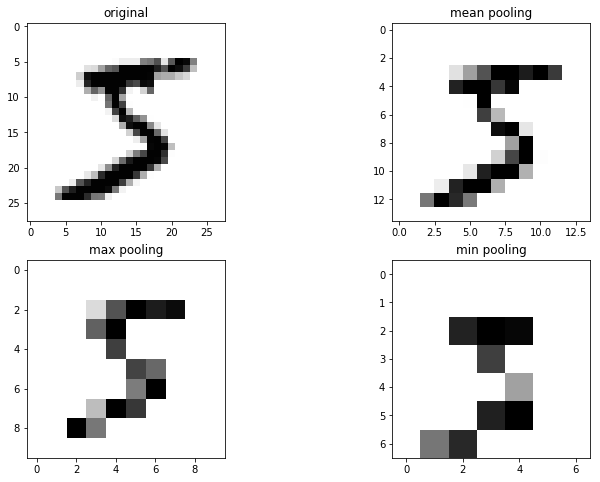

In [37]:
X = X_train[0]

X_1 = nn.AvgPool2d(kernel_size=1, stride=2, padding=0)(X)

X_2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)(X)

X_3 = -nn.MaxPool2d(kernel_size=2, stride=2, padding=0)(-X)

fig=plt.figure(figsize=(12, 8))
fig.add_subplot(2,2,1)
plt.imshow(-X[0])
plt.title("original")
fig.add_subplot(2,2,2)
plt.imshow(-X_1[0])
plt.title("mean pooling")
fig.add_subplot(2,2,3)
plt.imshow(-X_2[0])
plt.title("max pooling")
fig.add_subplot(2,2,4)
plt.imshow(-X_3[0])
plt.title("min pooling")


plt.show()

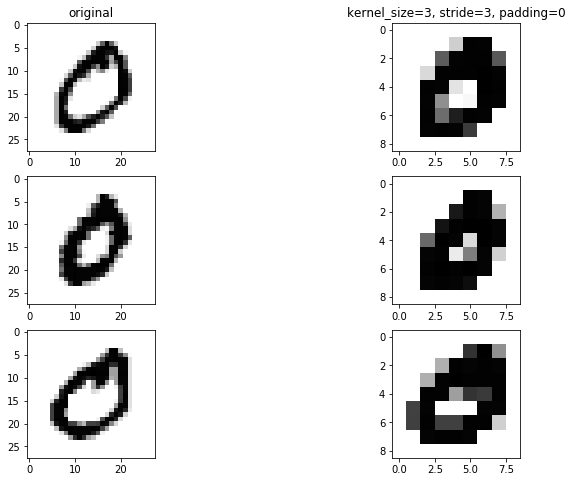

In [76]:
X = X_train[1]
Y = X_train[37]
Z = X_train[21]

X_1 = nn.MaxPool2d(kernel_size=3, stride=3, padding=0)(X)

X_2 = nn.MaxPool2d(kernel_size=3, stride=3, padding=0)(Y)

X_3 = nn.MaxPool2d(kernel_size=3, stride=3, padding=0)(Z)

fig=plt.figure(figsize=(12, 8))
fig.add_subplot(3,2,1)
plt.imshow(-X[0])
plt.title("original")
fig.add_subplot(3,2,2)
plt.imshow(-X_1[0])
plt.title("kernel_size=3, stride=3, padding=0")
fig.add_subplot(3,2,3)
plt.imshow(-Y[0])
fig.add_subplot(3,2,4)
plt.imshow(-X_2[0])
fig.add_subplot(3,2,5)
plt.imshow(-Z[0])
fig.add_subplot(3,2,6)
plt.imshow(-X_3[0])


plt.show()

In [79]:
X_1.shape

torch.Size([1, 9, 9])

# III- Creating and training a CNN model on MNIST

##### Import Pytorch and other useful librairies

In [1]:
from matplotlib import pyplot as plt
plt.gray()
import math
import numpy as np
import pandas as pd

import torch
import torchvision.datasets as datasets
import torch.nn.functional as F
from torch import nn
from torch import optim

In [2]:
loss_func = F.cross_entropy

def accuracy(Y_hat, Y):
    preds = torch.argmax(Y_hat, dim=1)
    return (preds == Y).float().mean()

##### Load and preprocess dataset

In [3]:
#import data
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='../data', train=False, download=True, transform=None)

#load trainset into tensors
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=1, shuffle=True)
X_train = train_loader.dataset.data
Y_train = train_loader.dataset.targets

#load testset into tensors
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10000, shuffle=False)
X_test = test_loader.dataset.data
Y_test = test_loader.dataset.targets

#scale data to [0:1] and convert to float32
X_train = (X_train.to(dtype=torch.float32) / X_train.max().to(dtype=torch.float32))
X_test = (X_test.to(dtype=torch.float32) / X_test.max().to(dtype=torch.float32))

#Flatten train and test data
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

print("Train examples : ",X_train.shape[0])
print("Test examples : ",X_test.shape[0])
print("Nb of features : ",X_train.shape[1])

Train examples :  60000
Test examples :  10000
Nb of features :  1


##### Define the CNN architecture

In [96]:
class NeuralNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 24, kernel_size=5, stride=1, padding=2)
        self.max1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.bn1 = nn.BatchNorm2d(24)
        self.conv2 = nn.Conv2d(24, 48, kernel_size=5, stride=1, padding=2)
        self.max2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.bn2 = nn.BatchNorm2d(48)
        self.conv3 = nn.Conv2d(48, 64, kernel_size=5, stride=1, padding=2)
        self.max3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.bn3 = nn.BatchNorm2d(64)
        self.linear4 = nn.Linear(64*3*3,256)
        self.bn4 = nn.BatchNorm1d(256)
        self.linear5 = nn.Linear(256,10)
 
    def forward(self, x):
        #print("--------FORWARD---------")
        x = torch.relu(self.conv1(x))
        #print("conv1 :" , x.shape)
        x = self.max1(x)
        x = self.bn1(x)
        #print("max1 :" , x.shape)
        x = torch.relu(self.conv2(x))
        #print("conv2 :" , x.shape)
        x = self.max2(x)
        x = self.bn2(x)
        #print("max2 :" , x.shape)
        x = torch.relu(self.conv3(x))
        #print("conv3 :" , x.shape)
        x = self.max3(x)
        x = self.bn3(x)
        #print("max3 :" , x.shape)
        x = self.linear4(torch.relu(x.reshape(x.shape[0],-1)))
        #print("linear4 :" , x.shape)
        x = self.bn4(x)
        x = self.linear5(torch.softmax(x,1))
        #print("linear5 :" , x.shape)
        return x
                            
                            
    def fit(self,optimizer,epochs,batch_size,lr,decay):
        n = X_train.shape[0]
        for epoch in range(epochs):
            #opt.param_groups[0]['lr'] = lr / (1+decay)
                           
            model.train()
            for i in range((n - 1) // batch_size + 1):
                optimizer.zero_grad()
                
                X = X_train[ i * batch_size : (i+1) * batch_size ]
                Y = Y_train[ i * batch_size : (i+1) * batch_size ]
                
                pred = self.forward( X )
                loss = loss_func( pred , Y )

                loss.backward()
                optimizer.step()
                
            print(epoch+1,"\t",loss.item())
            
            
            with torch.no_grad():
                model.eval()
                print("Test set \t", round(accuracy( model.forward(X_test) , Y_test).item(),3))

In [97]:
model = NeuralNet()

In [98]:
opt = optim.SGD(model.parameters(), lr=1)
opt_2 = optim.Adam(model.parameters(), lr=0.01)
epochs = 20
batch_size = 600
learning_rate = 1
decay = 0.1

model.fit(opt_2,epochs,batch_size,learning_rate,decay)

1 	 0.08516699075698853
Test set 	 0.975
2 	 0.04562624916434288
Test set 	 0.984
3 	 0.032392021268606186
Test set 	 0.988
4 	 0.028965575620532036
Test set 	 0.987
5 	 0.02674502693116665
Test set 	 0.988
6 	 0.02047395147383213
Test set 	 0.99
7 	 0.023352866992354393
Test set 	 0.989
8 	 0.025886444374918938
Test set 	 0.99
9 	 0.027795525267720222
Test set 	 0.99
10 	 0.022772518917918205
Test set 	 0.987
11 	 0.0373346172273159
Test set 	 0.985
12 	 0.016209373250603676
Test set 	 0.992
13 	 0.021052422001957893
Test set 	 0.993
14 	 0.022053474560379982
Test set 	 0.993
15 	 0.018207136541604996
Test set 	 0.993
16 	 0.017679264768958092
Test set 	 0.989
17 	 0.02370826154947281
Test set 	 0.989
18 	 0.02704772911965847
Test set 	 0.991
19 	 0.040121354162693024
Test set 	 0.988
20 	 0.015256193466484547
Test set 	 0.992


###### Load, Preprocess and predict test set from Kaggle

In [104]:
#Load data from CSV
test = pd.read_csv('../data/MNIST/test.csv')
test_tensor = torch.tensor(test.values)

#Preprocess
test_tensor = (test_tensor.to(dtype=torch.float32) / test_tensor.max().to(dtype=torch.float32))
test_tensor = test_tensor.reshape(test_tensor.shape[0],1,28,28)

#Predict
test_tensor = model.forward(test_tensor)
test_tensor = test_tensor.argmax(1)

##### Save predictions to a csv file

In [111]:
#Convert to a numpy array
arr = test_tensor.numpy()

# write CSV
np.savetxt('../data/MNIST/predictions.csv', arr)